# ML MINI PROJECT 

## Machine Learning Algorithms that suggests which crops to plant based on weather and soil conditions

In [1]:
#Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from ipywidgets import interact
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
#importing the dataset
df=pd.read_csv("Crop_recommendation.csv")

In [3]:
df.tail() #displayed the imported dataset in a dataframe in python

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.shape

(2200, 8)

### Data Preprocessing


In [6]:
#Checking the dataset for missing values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
# Displaying all the crops present in the dataset with thier total number of occurances
df.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
df.describe(include = 'all')

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [9]:
# Creating a UI using @interact to check the avg of each feature based on he label
@interact
def summary(crops = list(df['label'].value_counts().index)):
    x = df[df['label'] == crops]
    
    print("-"*30)
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required : ", x['N'].min())
    print("Average Nitrogen required : ", x['N'].mean())
    print("Maxiumm Nitrogen required : ", x['N'].max())
    
    print("-"*30)
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required : ", x['P'].min())
    print("Average Phosphorous required : ", x['P'].mean())
    print("Maxiumm Phosphorous required : ", x['P'].max())
    
    print("-"*30)
    print("Statistics for Potassium")
    print("Minimum Potassium required : ", x['K'].min())
    print("Average Potassium required : ", x['K'].mean())
    print("Maxiumm Potassium required : ", x['K'].max())
    
    print("-"*30)
    print("Statistics for temperature")
    print("Minimum temperature required : ", x['temperature'].min())
    print("Average temperature required : ", x['temperature'].mean())
    print("Maxiumm temperature required : ", x['temperature'].max())
    
    print("-"*30)
    print("Statistics for humidity")
    print("Minimum humidity required : ", x['humidity'].min())
    print("Average humidity required : ", x['humidity'].mean())
    print("Maxiumm humidity required : ", x['humidity'].max())
    
    print("-"*30)
    print("Statistics for ph")
    print("Minimum ph required : ", x['ph'].min())
    print("Average ph required : ", x['ph'].mean())
    print("Maxiumm ph required : ", x['ph'].max())
    
    print("-"*30)
    print("Statistics for rainfall")
    print("Minimum rainfall required : ", x['rainfall'].min())
    print("Average rainfall required : ", x['rainfall'].mean())
    print("Maxiumm rainfall required : ", x['rainfall'].max())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

/Users/kusaihajuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kusaihajuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kusaihajuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

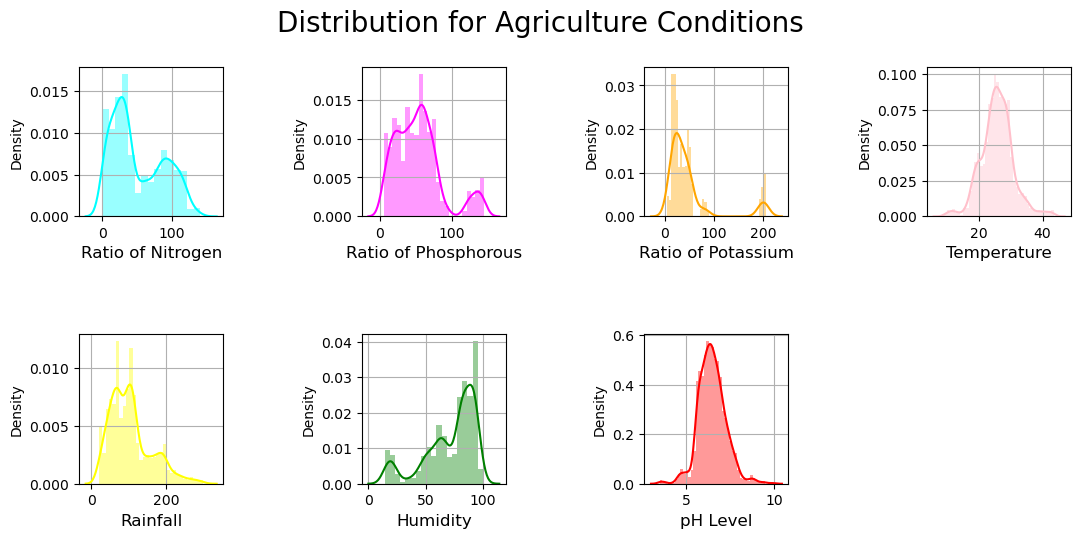

In [10]:
# set the spacing between subplots
fig = plt.figure(figsize=(12, 6)) # Adjusting the size of the figure

plt.subplot(2,4,1) #subplot for Distribution of Nitrogen
sns.distplot(df['N'], color = 'cyan')
plt.xlabel("Ratio of Nitrogen", fontsize = 12)
plt.grid()

plt.subplot(2,4,2) #subplot for Distribution of Phosphorous
sns.distplot(df['P'], color = 'magenta')
plt.xlabel("Ratio of Phosphorous", fontsize = 12)
plt.grid()


plt.subplot(2,4,3) #subplot for Distribution of Potassium
sns.distplot(df['K'], color = 'orange')
plt.xlabel("Ratio of Potassium", fontsize = 12)
plt.grid()

plt.subplot(2,4,4) #subplot for Distribution of temperature
sns.distplot(df['temperature'], color = 'pink')
plt.xlabel("Temperature", fontsize = 12)
plt.grid()

plt.subplot(2,4,5) #subplot for Distribution of rainfall
sns.distplot(df['rainfall'], color = 'yellow')
plt.xlabel("Rainfall", fontsize = 12)
plt.grid()

plt.subplot(2,4,6) #subplot for Distribution of humidity
sns.distplot(df['humidity'], color = 'green')
plt.xlabel("Humidity", fontsize = 12)
plt.grid()

plt.subplot(2,4,7) #subplot for Distribution of ph
sns.distplot(df['ph'], color = 'red')
plt.xlabel("pH Level", fontsize = 12)
plt.grid()

fig.tight_layout(pad=5.0) #padding to space all the subplots properly

plt.suptitle("Distribution for Agriculture Conditions", fontsize = 20)
plt.show()

### Clustering

In [11]:
x = df.drop(['label'], axis = 1)
y = df['label']
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [12]:
#Storing each row of feature column in an ndarray to improve speed and compatability
X = x.values

In [13]:
plt.rcParams['figure.figsize'] = (10,4)

# creating a list [WCSS] to store, the sum of squares of the distances of each data point in all clusters to their respective
# centroids.
wcss = [] 

for i in range(1,11): # Determining the optimum number of clusters within the dataset
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    print("Iteration ", i, " Done.")

Iteration  1  Done.
Iteration  2  Done.
Iteration  3  Done.
Iteration  4  Done.
Iteration  5  Done.
Iteration  6  Done.
Iteration  7  Done.
Iteration  8  Done.
Iteration  9  Done.
Iteration  10  Done.


In [14]:
#Contains the values of th sum of squares of distances of each data point from thier centroids. 
#The minimum sum is the best case scenario
print(wcss)

[18820170.46364589, 12070916.353533508, 7423970.8654109, 5337369.950298384, 4417511.116768206, 3748646.2079994963, 3122776.0933495276, 2727858.0937568443, 2374020.0367853697, 2132297.3163274443]


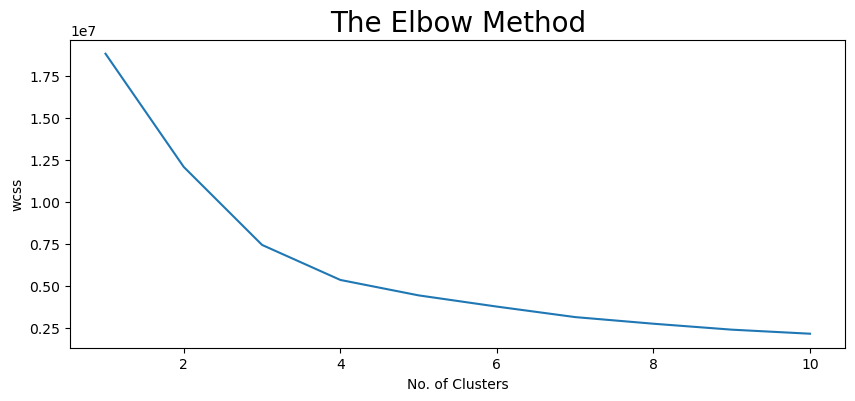

In [15]:
plt.rcParams['figure.figsize'] = (10,4)

# Plotting the results to determine the number of clusters
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method", fontsize = 20)
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.show()

#From the, graph we observe that there are 2 elbows, one at 3 and one at 4
#4 is the last elbow so we consider 4, hence we have number of clusters=4

### Feature Importance

Feature Importances:
rainfall: 0.2256759934857828
humidity: 0.21597590094551247
K: 0.17767547550149299
P: 0.1521065022470749
N: 0.1017054407393033
temperature: 0.07368539052650636
ph: 0.053175296554327296


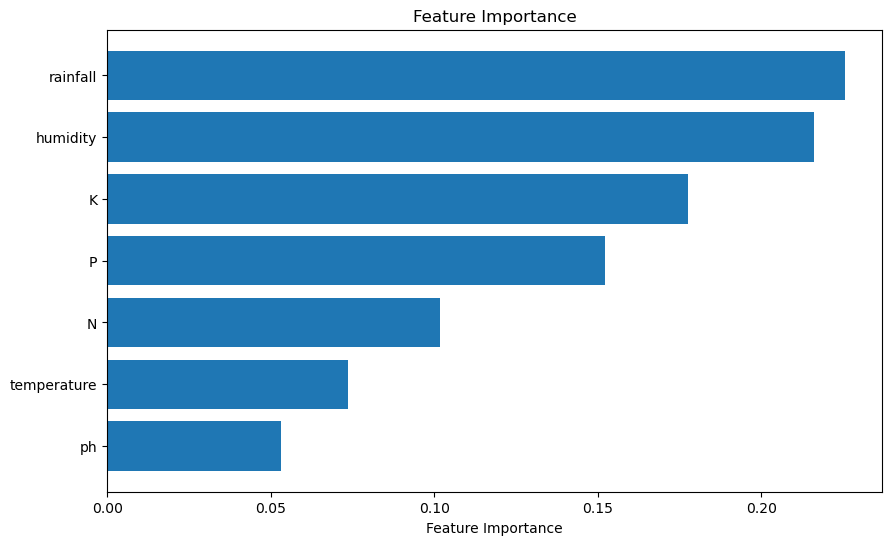

In [16]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
feature_names = x.columns
rf_classifier.fit(x, y)
feature_importances = rf_classifier.feature_importances_
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print("Feature Importances:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

#A bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), [importance for _, importance in sorted_feature_importance], align='center')
plt.yticks(range(len(sorted_feature_importance)), [feature for feature, _ in sorted_feature_importance])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
plt.show()

### ML Model [Decision Tree]

In [17]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [18]:
acc=[]#Storing accuracy of all models in this list
mod=[]#Storing Name of all models in this list

In [19]:
#Splitting the dataset into training and testing part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

In [20]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(X_train,y_train)
predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
mod.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x)

DecisionTrees's Accuracy is:  0.925


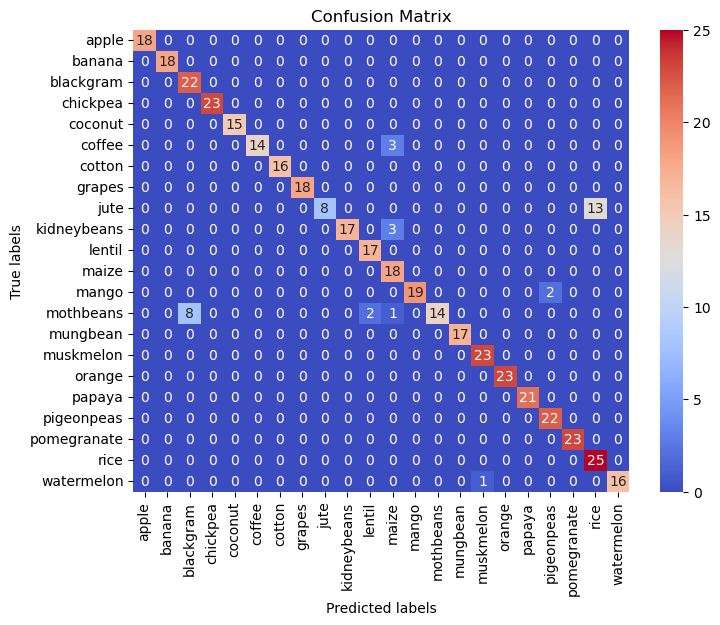

In [21]:
cm = confusion_matrix(y_test, predicted_values)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target, cv = 5)

In [23]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### ML Model [Naive Bayes]

In [24]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)
predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
mod.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

Naive Bayes's Accuracy is:  0.9931818181818182


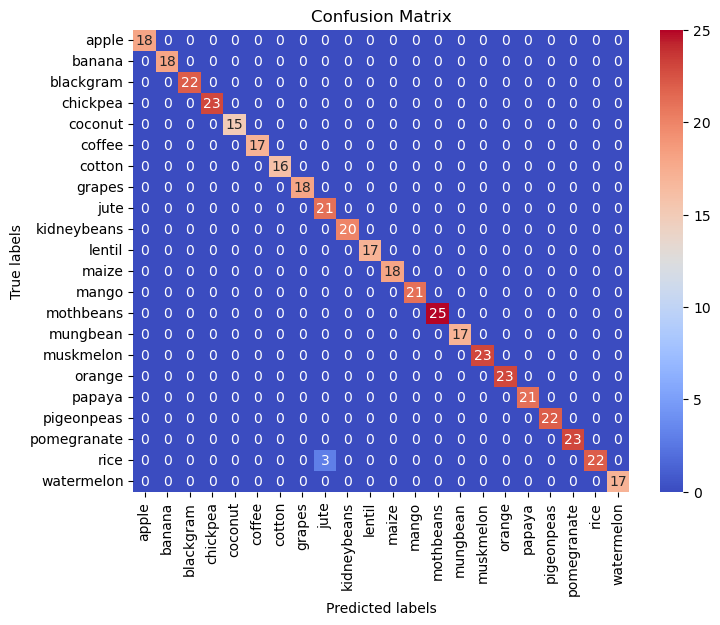

In [25]:
cm = confusion_matrix(y_test, predicted_values)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)

In [27]:
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### ML Model [Logistic Regression]

In [28]:
X = df.drop(['label'], axis = 1)
y = df['label']

X.shape, y.shape

((2200, 7), (2200,))

In [29]:
# using logistic Regression model to help predict the label 
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [30]:
#storing all predicted values in y_pred
y_pred = model.predict(X_test)
y_pred

array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'jute', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'coffee', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'rice', 'cotton', 'coffee', 'lentil', 'orange',
       'mothbeans', 'kidneybeans', 'pomegranate', 'rice', 'maize',
       'muskmelon', 'coconut', 'cotton', 'mango', 'mango', 'watermelon',
       'mothbeans', 'maize', 'blackgram', 'pigeonpeas', 'watermelon',
       'pigeonpeas', 'mungbean', 'kidneybeans', 'kidneybeans', 'cotton',
       'mungbean', 'mothbeans', 'blackgram', 'apple', 'muskmelon',
       'pigeonpeas', 'banana', 'papaya', 'mango', 'lentil', 'cotton',
       'orange', 'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple',
       'grapes', 'coffee', 'apple', 'orange', 'coconut', 'pomegranate',
       'kidneybeans', 'maize', 'grapes', 'mothbeans', 'chickpea', 'maize',
       'jute',

In [31]:
x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
mod.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

Logistic Regression's Accuracy is:  0.9613636363636363


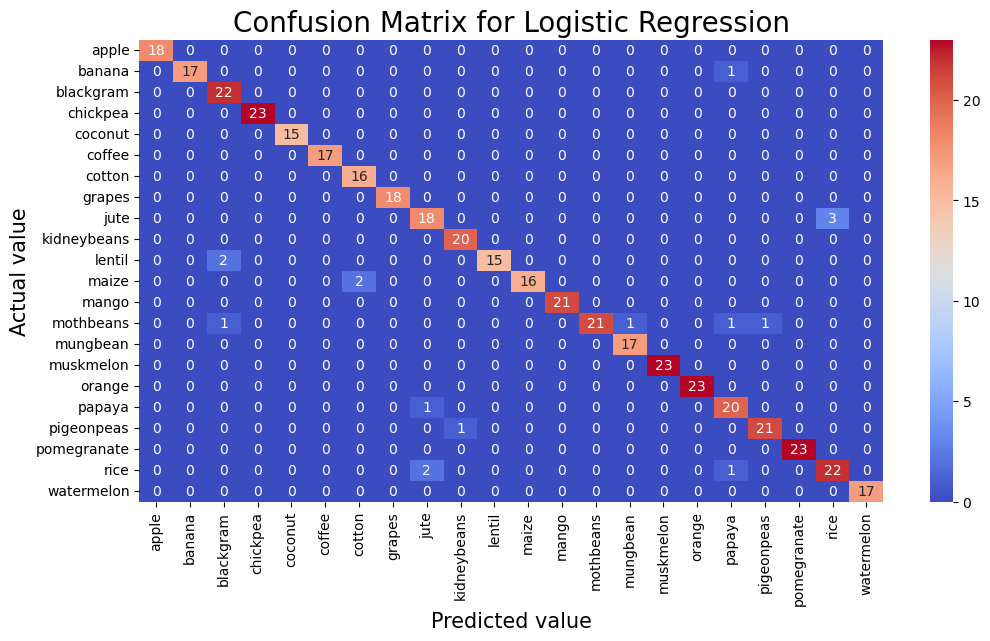

In [32]:
#Calculating the accuracy of the model
fig = plt.figure(figsize=(12, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted value", fontsize=15)
plt.ylabel("Actual value", fontsize=15)
plt.title("Confusion Matrix for Logistic Regression", fontsize = 20)
plt.show()

In [33]:
score = cross_val_score(model,features,target,cv=5)

In [34]:
score

array([0.96818182, 0.93636364, 0.95681818, 0.95681818, 0.94772727])

### Model Accuracy Comparision

In [35]:
acc

[0.925, 0.9931818181818182, 0.9613636363636363]

In [36]:
mod

['Decision Tree', 'Naive Bayes', 'Logistic Regression']

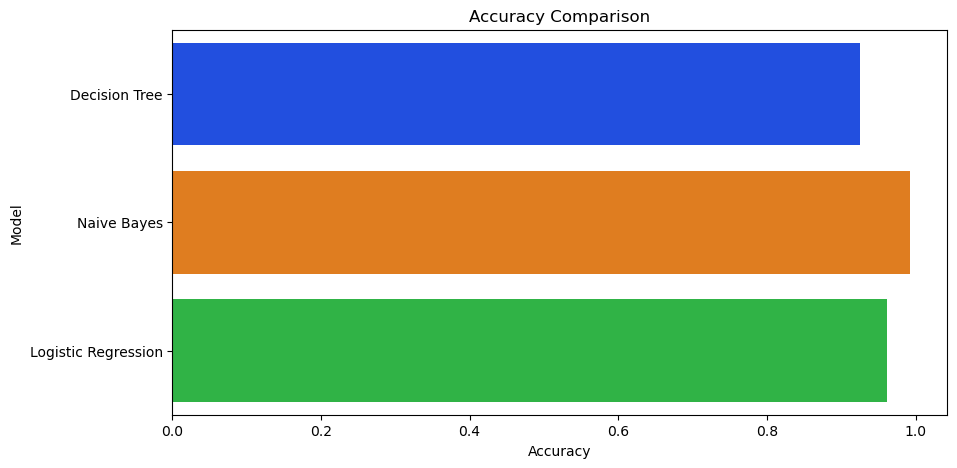

In [37]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = acc,y = mod,palette='bright')
plt.savefig('ML_Crop_Recc_plot.png')

### Predicting crop based on user given values

In [45]:
crop_states_mapping = {
    'rice': ['Punjab', 'Haryana', 'Uttar Pradesh', 'Andhra Pradesh', 'Tamil Nadu', 'Karnataka', 'West Bengal', 'Odisha', 'Assam', 'Meghalaya', 'Kerala', 'Bihar', 'Arunachal Pradesh', 'Manipur', 'Nagaland'],
    
    'maize': ['Uttar Pradesh', 'Bihar', 'Punjab', 'Madhya Pradesh', 'Chhattisgarh', 'West Bengal', 'Odisha'],
    
    'chickpea': ['Madhya Pradesh', 'Uttar Pradesh', 'Rajasthan', 'Maharashtra'],
    
    'kidneybeans': ['Himachal Pradesh', 'Jammu and Kashmir', 'Uttarakhand'],
    
    'pigeonpeas': ['Maharashtra', 'Karnataka', 'Madhya Pradesh'],
    
    'mothbeans': ['Rajasthan', 'Maharashtra', 'Gujarat'],
    
    'mungbean': ['Rajasthan', 'Maharashtra', 'Gujarat', 'Andhra Pradesh'],
    
    'blackgram': ['Madhya Pradesh', 'Uttar Pradesh', 'Maharashtra'],
    
    'lentil': ['Madhya Pradesh', 'Uttar Pradesh', 'Rajasthan'],
    
    'pomegranate': ['Maharashtra', 'Karnataka', 'Andhra Pradesh'],
    
    'banana': ['Tamil Nadu', 'Maharashtra', 'Gujarat', 'Karnataka', 'Andhra Pradesh'],
    
    'mango': ['Maharashtra', 'Andhra Pradesh', 'Telangana', 'Karnataka', 'Gujarat'],
    
    'grapes': ['Maharashtra', 'Karnataka', 'Telangana'],
    
    'watermelon': ['Maharashtra', 'Karnataka', 'Andhra Pradesh'],
    
    'muskmelon': ['Maharashtra', 'Karnataka', 'Andhra Pradesh'],
    
    'apple': ['Jammu and Kashmir', 'Himachal Pradesh'],
    
    'orange': ['Maharashtra', 'Madhya Pradesh', 'Assam', 'Manipur', 'Nagaland'],
    
    'papaya': ['Andhra Pradesh', 'Gujarat', 'Karnataka'],
    
    'coconut': ['Kerala', 'Karnataka', 'Tamil Nadu', 'Andhra Pradesh'],
    
    'cotton': ['Gujarat', 'Maharashtra', 'Rajasthan', 'Andhra Pradesh'],
    
    'jute': ['West Bengal', 'Bihar', 'Assam'],
    
    'coffee': ['Karnataka', 'Kerala', 'Tamil Nadu']
}


In [51]:
n = int(input("Enter the amount of Nitrogen[N]: "))
p = int(input("Enter the amount of Phosphorous[P]: "))
k = int(input("Enter the amount of Potassium[K]: "))
temp = int(input("Enter the Temperature: "))
humid = int(input("Enter the Humidity: "))
ph = int(input("Enter the value of ph: "))
rain = int(input("Enter the amount of Rainfall: "))

#predicting the crop based on user given values
pred = model.predict(
    (
        np.array(
            [
                [
                    n,   # Value for N
                    p,   # Value for P
                    k,   # Value for K
                    temp,   # Value for Temp
                    humid,   # Value for Humidity
                    ph,    # Value for pH
                    rain   # Value for Rainfall
                ]
            ]
        )
    )
)
print("\n")
print("The Suggested Crop for Given Climatic Condition is ", pred)
print("The States where you can grow the crop are: ")
for j in pred:
    for i in crop_states_mapping[j]:
        print(i)

Enter the amount of Nitrogen[N]: 100
Enter the amount of Phosphorous[P]: 100
Enter the amount of Potassium[K]: 100
Enter the Temperature: 100
Enter the Humidity: 100
Enter the value of ph: 100
Enter the amount of Rainfall: 100


The Suggested Crop for Given Climatic Condition is  ['mothbeans']
The States where you can grow the crop are: 
Rajasthan
Maharashtra
Gujarat
